In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from ipywidgets import widgets
from sklearn.model_selection import train_test_split

# Cargar dataset
df_jugadores = pd.read_csv('jugadores_cebollitas.csv')

df_jugadores.head()

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047


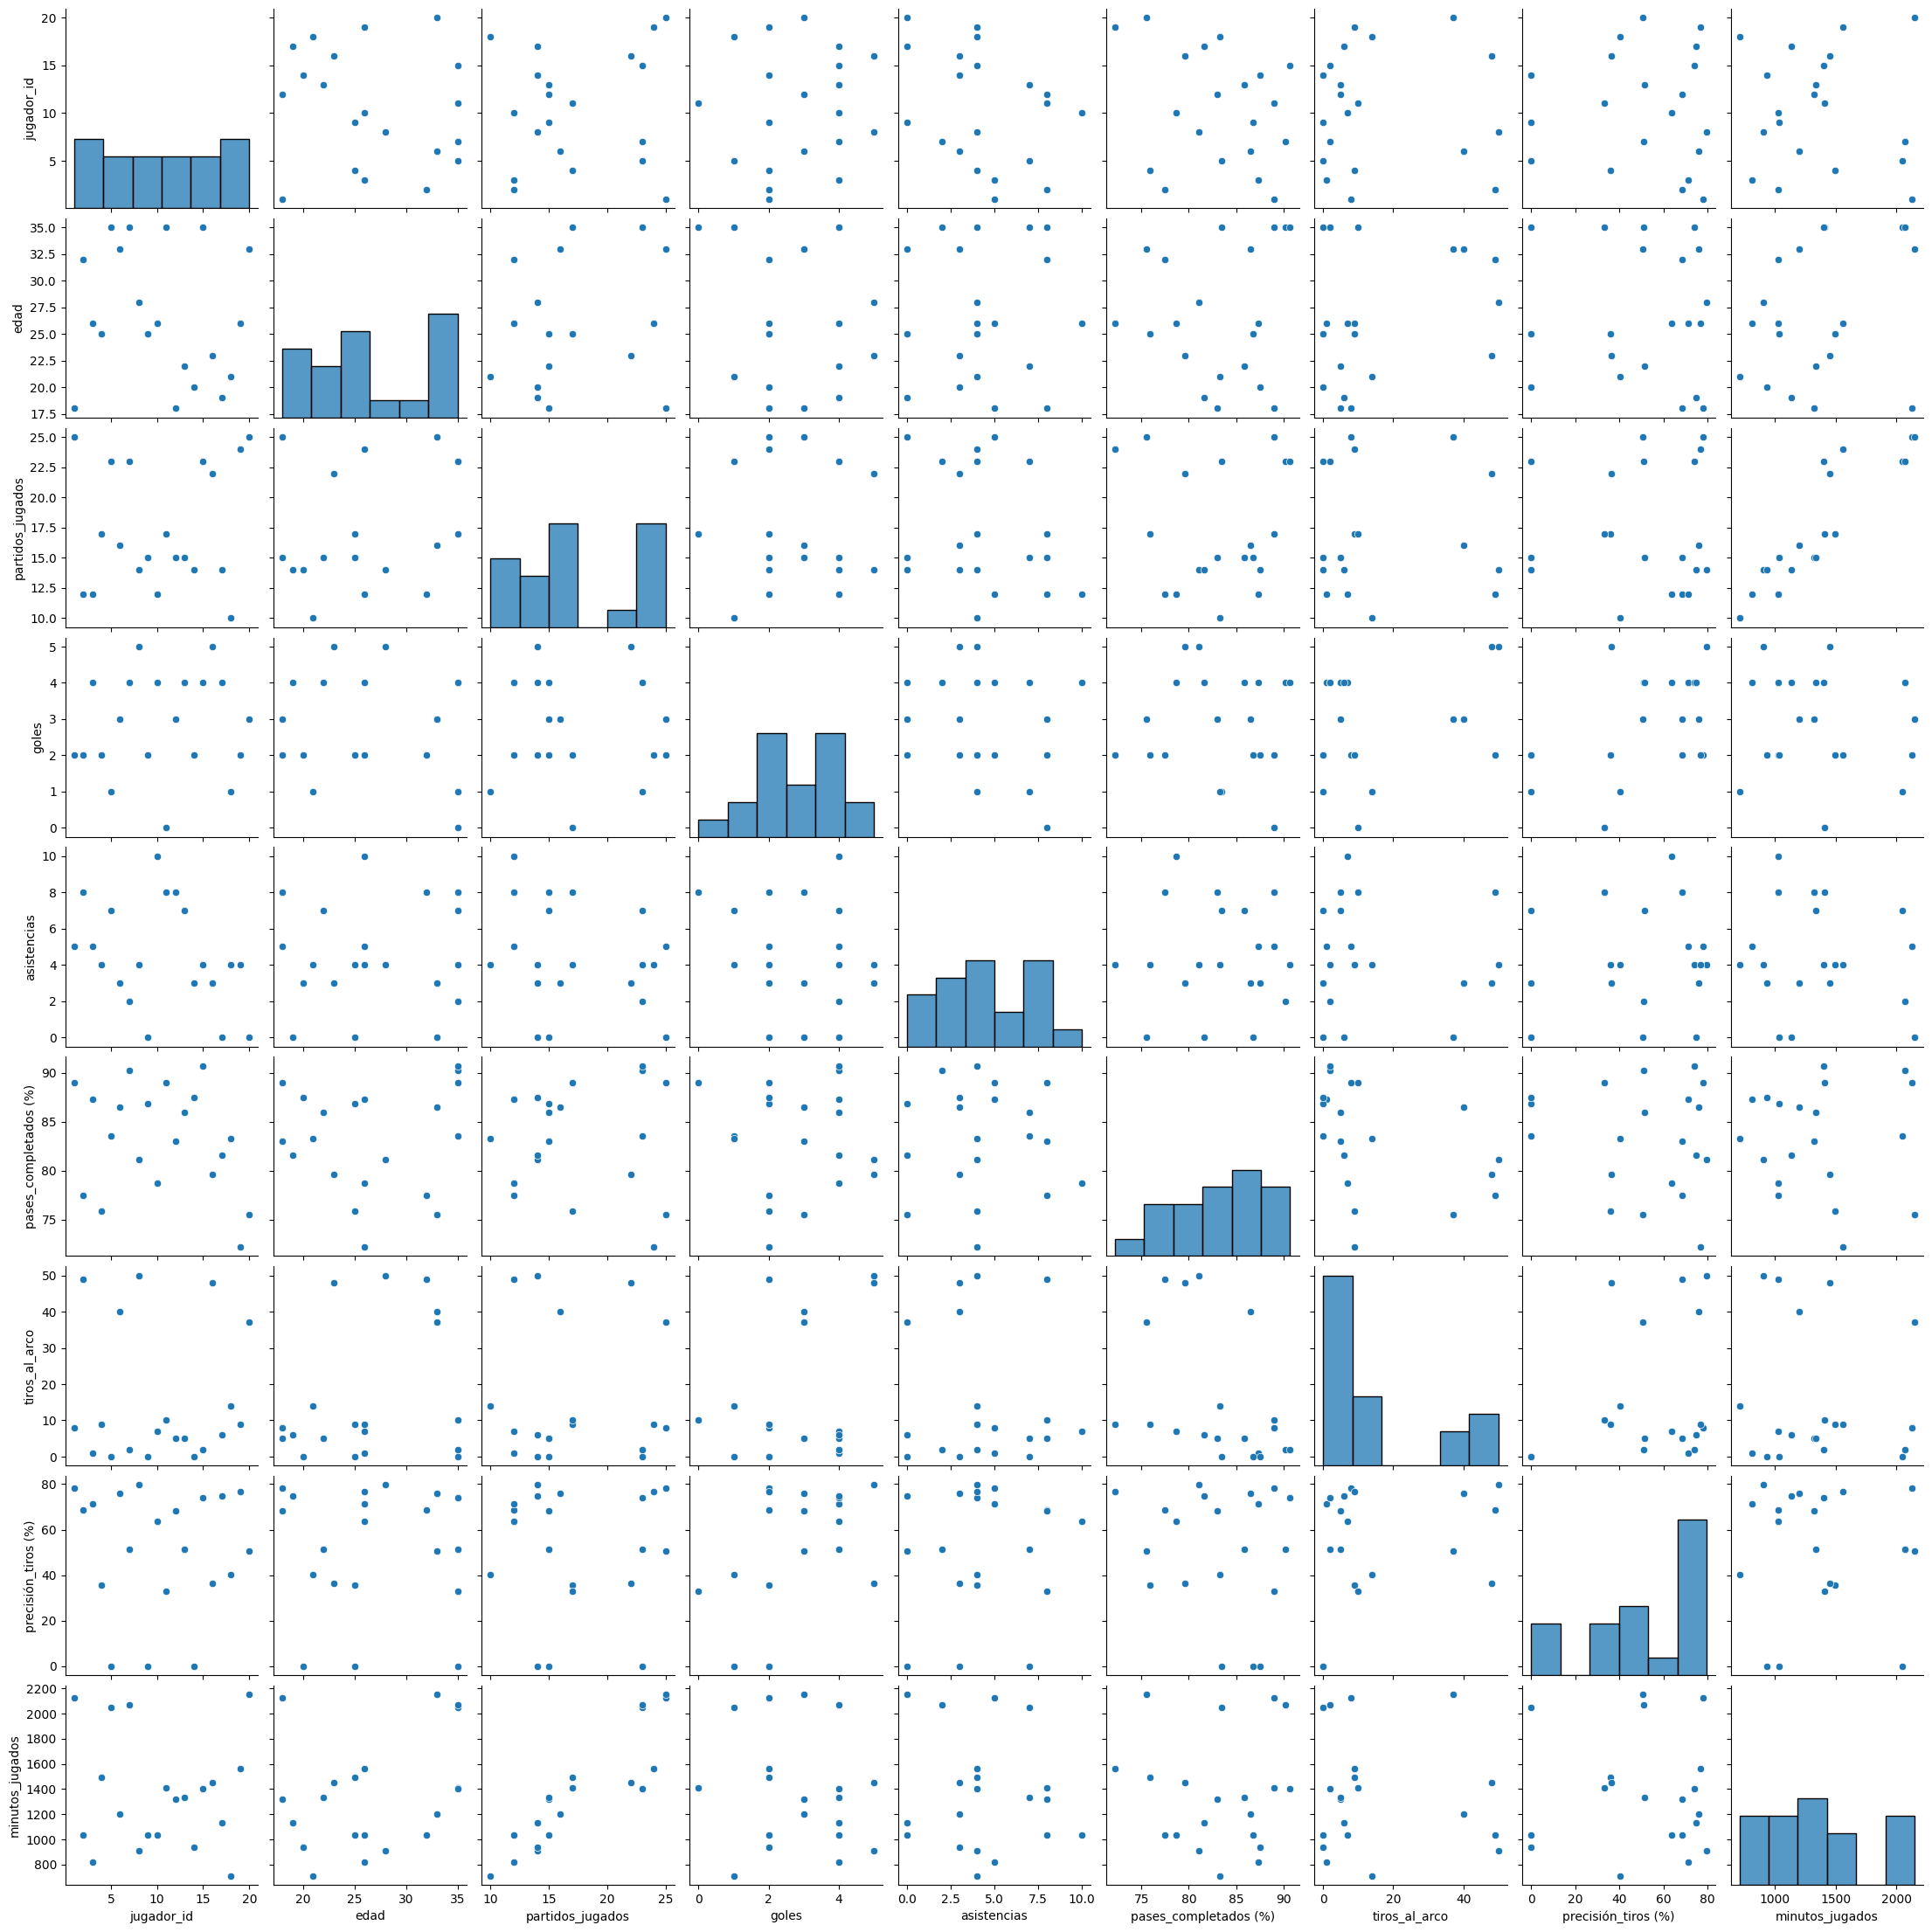

In [2]:
sns.pairplot(df_jugadores)
plt.show()

In [3]:
from sklearn.cluster import KMeans

X = df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

kmeans = KMeans(n_clusters=3, random_state=42)
df_jugadores['cluster'] = kmeans.fit_predict(X)

df_jugadores.head()

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados,cluster
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125,1
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032,0
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816,1
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496,2
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047,1


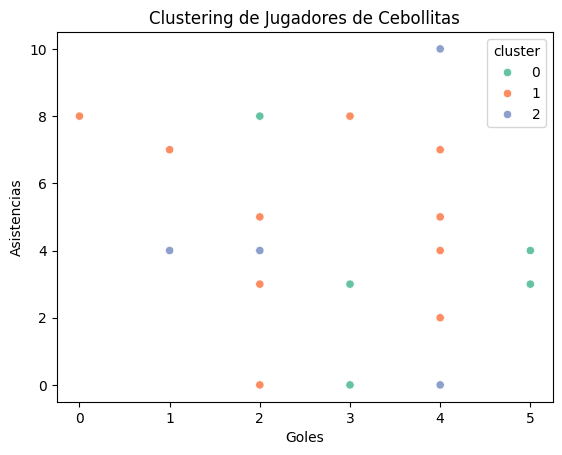

In [4]:
sns.scatterplot(x='goles', y='asistencias', hue='cluster', data=df_jugadores, palette='Set2')
plt.title('Clustering de Jugadores de Cebollitas')
plt.ylabel('Asistencias')
plt.xlabel('Goles')
plt.show()

In [5]:
columnas_numericas = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']
perfiles = df_jugadores.groupby('cluster')[columnas_numericas].mean()
print(perfiles)

         goles  asistencias  pases_completados (%)  tiros_al_arco
cluster                                                          
0          3.6          3.6                  80.04           44.8
1          2.6          4.9                  87.29            3.3
2          2.6          4.4                  78.34            9.0


In [6]:
import ipywidgets as widgets

def clustering_interactivo(k):
    km = KMeans(n_clusters=k, random_state=42)
    df_jugadores['cluster'] = km.fit_predict(X)

    sns.scatterplot(x='goles', y='asistencias', hue='cluster', data=df_jugadores, palette='Set2')
    plt.title(f'Clustering de Jugadores de Cebollitas con {k} clusters')
    plt.ylabel('Asistencias')
    plt.xlabel('Goles')
    plt.show()  

widgets.interact(clustering_interactivo, k=widgets.IntSlider(min=2, max=6, step=1, value=3))

interactive(children=(IntSlider(value=3, description='k', max=6, min=2), Output()), _dom_classes=('widget-inte…

<function __main__.clustering_interactivo(k)>

/var/folders/2b/4s639x9s6qn54sbrtyhszj180000gn/T/ipykernel_18249/3380997397.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')


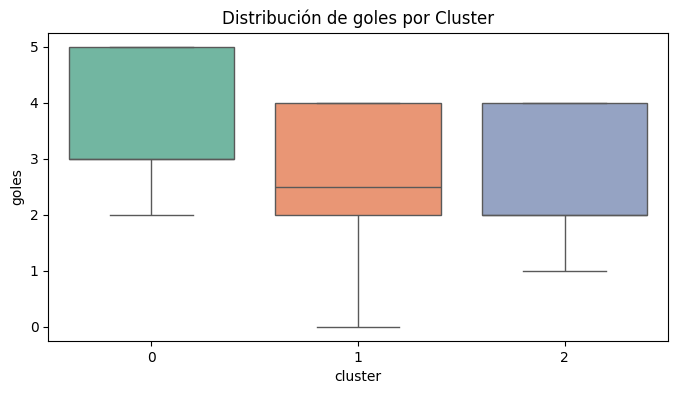

/var/folders/2b/4s639x9s6qn54sbrtyhszj180000gn/T/ipykernel_18249/3380997397.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')


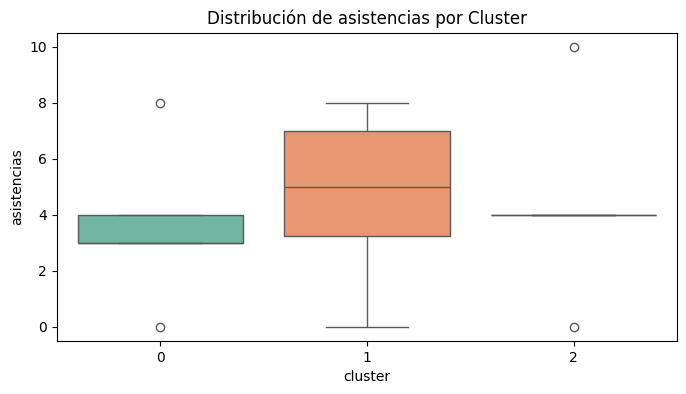

/var/folders/2b/4s639x9s6qn54sbrtyhszj180000gn/T/ipykernel_18249/3380997397.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')


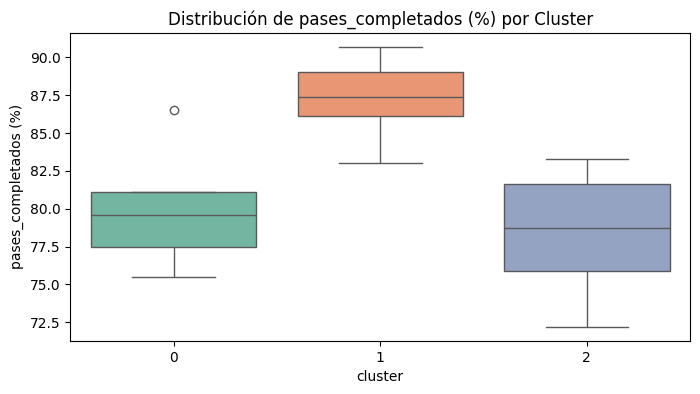

/var/folders/2b/4s639x9s6qn54sbrtyhszj180000gn/T/ipykernel_18249/3380997397.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')


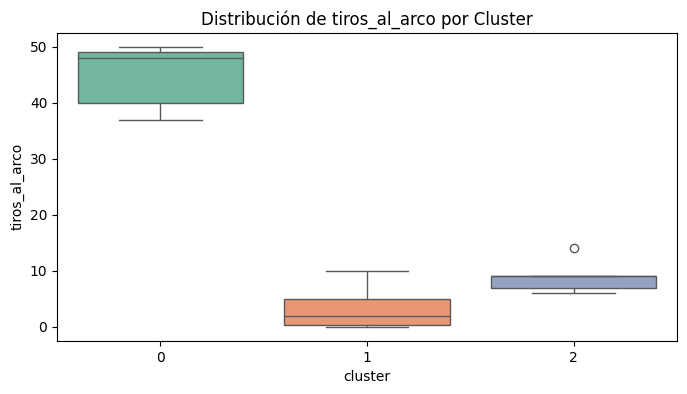

In [8]:
features = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='cluster', y=feature, data=df_jugadores, palette='Set2')
    plt.title(f'Distribución de {feature} por Cluster')
    plt.show()

In [12]:
from IPython.display import display

cluster_selector = widgets.Dropdown(
    options=df_jugadores['cluster'].unique(), 
    description='Cluster:'
)

def mostrar_jugadores(cluster):
    jugadores = df_jugadores[df_jugadores['cluster'] == cluster]
    display(jugadores[['nombre', 'goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']])

widgets.interact(mostrar_jugadores, cluster=cluster_selector)

interactive(children=(Dropdown(description='Cluster:', options=(np.int32(1), np.int32(0), np.int32(2)), value=…

<function __main__.mostrar_jugadores(cluster)>

# PCA

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df_jugadores['PC1'] = components[:, 0]
df_jugadores['PC2'] = components[:, 1]

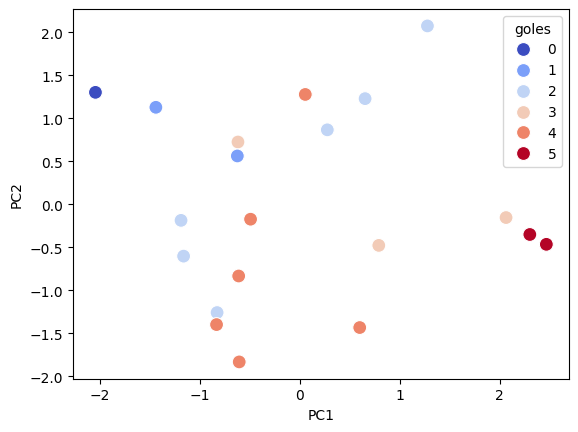

In [15]:
sns.scatterplot(x='PC1', y='PC2', hue='goles', data=df_jugadores, palette='coolwarm', s=100)
plt.show()

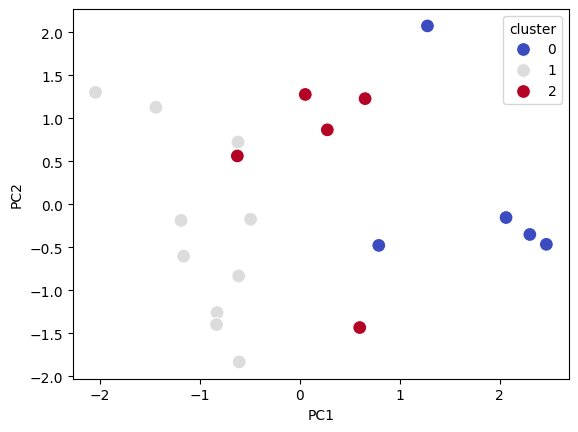

In [16]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_jugadores, palette='coolwarm', s=100)
plt.show()

In [20]:
def explorar_componentes(eje_x, eje_y):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=eje_x, y=eje_y, hue='cluster', data=df_jugadores, palette='Set2', s=100)
    plt.title(f'Exploración de Componentes: {eje_x} vs {eje_y}')
    plt.xlabel(eje_x)
    plt.ylabel(eje_y)
    plt.show()

widgets.interact(explorar_componentes, 
                 eje_x=widgets.Dropdown(options=['PC1', 'PC2'], value='PC1', description='Eje X:'),
                 eje_y=widgets.Dropdown(options=['PC1', 'PC2'], value='PC2', description='Eje Y:')) 

interactive(children=(Dropdown(description='Eje X:', options=('PC1', 'PC2'), value='PC1'), Dropdown(descriptio…

<function __main__.explorar_componentes(eje_x, eje_y)>